In [1]:
import numpy as np
import pandas as pd
import joblib
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
train_df = joblib.load('../../dataset/train_preprocessed_classification.joblib')
test_df = joblib.load('../../dataset/test_preprocessed_classification.joblib')

In [3]:
train_df.head(10)

,telecommuting,has_company_logo,has_questions,fraudulent,word_000,word_0001pt,word_00am,word_00pm,word_0400,word_0cm,...,word_του,word_τους,word_των,word_υλοποίηση,word_υπηρεσίες,word_υπηρεσιών,word_χρόνια,word_χώρο,word_όπως,word_ότι
0,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_train = train_df.drop('fraudulent', axis=1)
y_train = train_df.fraudulent
X_test = test_df.drop('fraudulent', axis=1)
y_test = test_df.fraudulent

In [6]:
param_grid = {
    "alpha": [0.01] # np.logspace(-6, 6, 13),
}
param_grid

{'alpha': [0.01]}

In [7]:
model = ComplementNB()

In [8]:
grid_search = GridSearchCV(model, param_grid=param_grid, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=ComplementNB(), param_grid={'alpha': [0.01]},
             scoring='roc_auc')

In [9]:
print("Best parameter combination")
best_alpha = grid_search.best_estimator_.get_params()['alpha']
print(f'alpha: {best_alpha}')

Best parameter combination
alpha: 0.01


<Axes: xlabel='param_alpha', ylabel='mean_test_score'>

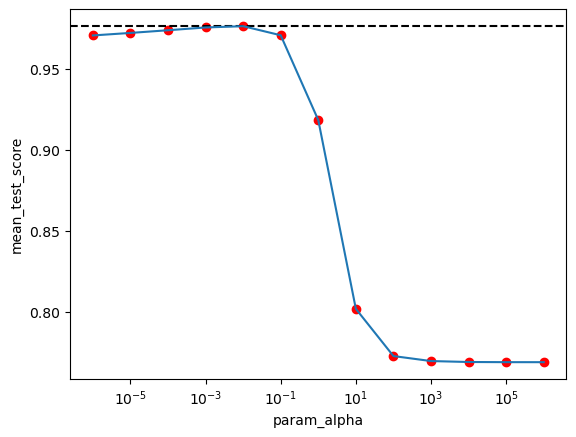

In [44]:
results = pd.DataFrame(grid_search.cv_results_)

plt.axhline(y=results["mean_test_score"].max(), color="black", linestyle="--")
plt.xscale('log')
plt.scatter(results.param_alpha, results.mean_test_score, color="red")
sns.lineplot(data=results, x="param_alpha", y="mean_test_score")

In [10]:
model = grid_search.best_estimator_

In [11]:
y_pred = model.predict(X_test)

In [12]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [13]:
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5615
           1       0.59      0.90      0.71       286

    accuracy                           0.96      5901
   macro avg       0.79      0.93      0.85      5901
weighted avg       0.97      0.96      0.97      5901



In [14]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 5901 points : 209


[[5436  179]
 [  30  256]]


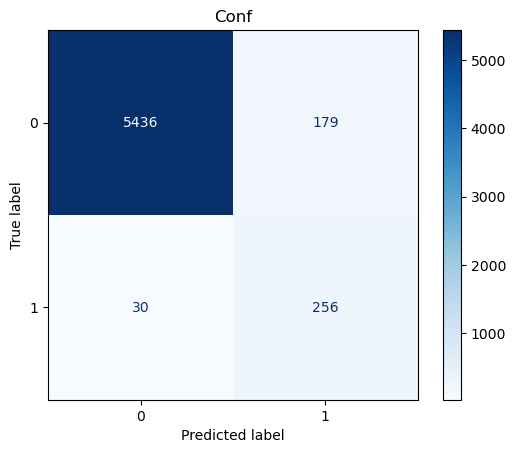

In [15]:
disp = ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        display_labels=[0, 1],
        cmap=plt.cm.Blues,
        normalize=None,
    )
disp.ax_.set_title('Conf')

print(disp.confusion_matrix)

In [16]:
joblib.dump(model, 'complement_naive_bayes.joblib')

['complement_naive_bayes.joblib']

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [22]:
roc_auc = auc(fpr, tpr)

In [25]:
joblib.dump((fpr, tpr, roc_auc), 'nb_roc.joblib')

['nb_roc.joblib']